# *Exploratory Data Analysis On Avocado Dataset*

### _Importing Modules_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from decimal import Decimal

### _Loading the Dataset_

In [2]:
data = pd.read_csv('avocado.csv')

In [3]:
data.drop('Unnamed: 0',axis =1,inplace =True)

In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)       # Sorting the data by the dates

data = data.reset_index().drop('index',axis=1)

### _Cleaning the dataset_

In [5]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### There is no null values in the dataset and it is clean. Now Let's get started with the Exploratory Data Analysis!

## *Exploratory Data Analysis*

Text(0.5, 1.0, 'Avocado Average Price Over Time')

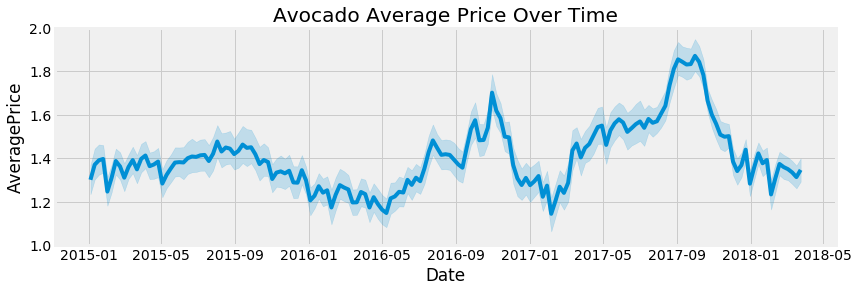

In [6]:
plt.figure(figsize =(14,4))
plt.style.use('fivethirtyeight')
plt.ylim(1,2)
sns.lineplot(data['Date'],data['AveragePrice']).set_title('Avocado Average Price Over Time')

#### - Compare to the price in early 2015 and early 2018, there wasn't any significant change in the price. However, the average price of avocados fluctuated substantially during the last 2 years.  There was a constant rise and fall of the average price until May 2016. Once the average price hit the bottom price in May 2016, It rose expeditiously for the next 6 months and dropped significantly in 3 months to the bottom price again. Since it reached the bottom price again in Feb 2017, it rose strikingly for next 8 more months and recorded the highest average price of approximately 1.9 Dollars. Similar to the previous year, once it recorded the highest price, it dropped significantly until early 2018. Overall, we can spot out the price pattern: If there is a rapid increase in price in a short period, the price will drop rapidly in the next few months as well. 

Text(0.5, 1.0, 'Total Volume Sold Over Time')

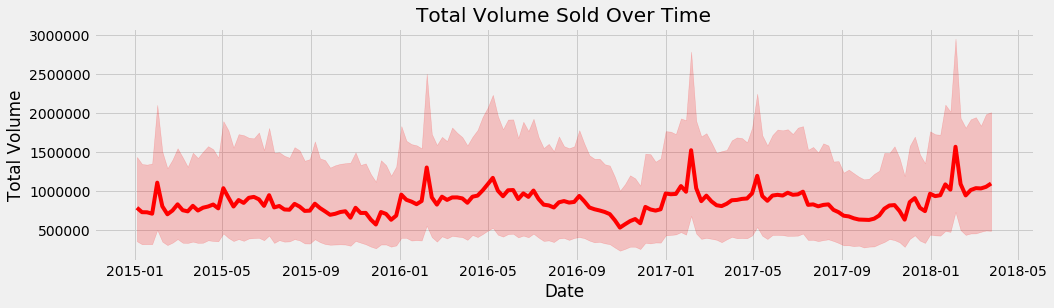

In [7]:
plt.figure(figsize=(15,4))
sns.lineplot(data['Date'],data['Total Volume'],color='red').set_title('Total Volume Sold Over Time')

#### - In Contrast to the average price, the total volume sold over  3 years increased slightly. The total volume sold remained constant between 5000000 to 1500000 for 3 years. We can also spot out that each year's peak was recorded between February to March. Furthermore, once it reached the peak, it dropped expeditiously as well.

## _Bar Charts_

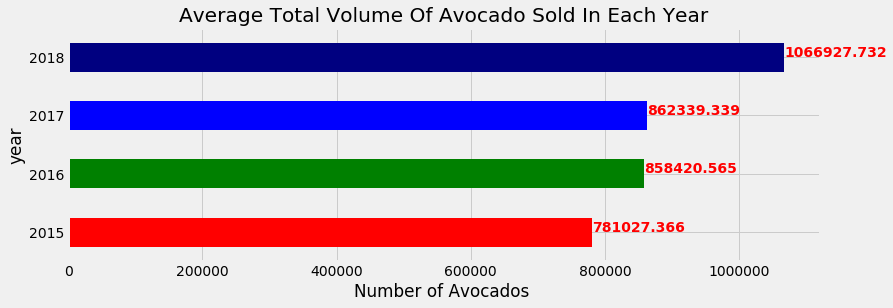

In [8]:
data_avg = data.groupby('year').mean()
plt.figure(figsize=(12,4))
plt.title('Average Total Volume Of Avocado Sold In Each Year')
plt.xlabel('Number of Avocados ')
data_avg['Total Volume'].plot(kind="barh",legend=False,color=['red','green','blue','navy'])
for i, v in enumerate(data_avg['Total Volume']):
    value = Decimal(v)
    plt.text(v+1,i + .01, str(round(value,3)), color='red', fontweight='bold')

#### - According to the graph above, 2018 recorded the most sales compare to other years. However, since there were only 3 months of data in 2018, it might be inaccurate to consider 2018. Therefore, excluding 2018, 2017 recorded the most sales on average compare to the past 2 years. In general, there was a slight rise in the average avocados sold over the years.

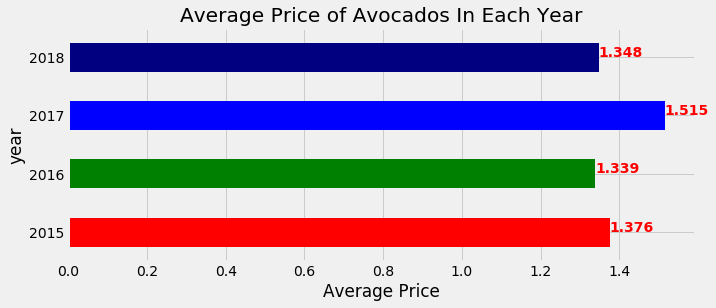

In [9]:
plt.figure(figsize=(10,4))
plt.xlabel('Average Price')
plt.title('Average Price of Avocados In Each Year')
data_avg['AveragePrice'].plot(kind="barh",legend=False,color=['red','green','blue','navy'])
for i, v in enumerate(data_avg['AveragePrice']):
    value = Decimal(v)
    plt.text(v , i + .01, str(round(value,3)), color='red', fontweight='bold')

#### - The average price of avocados in 2017 was most expensive compare to other years. The average price in 2017 was approximately $0.2 dollars higher than the rest.

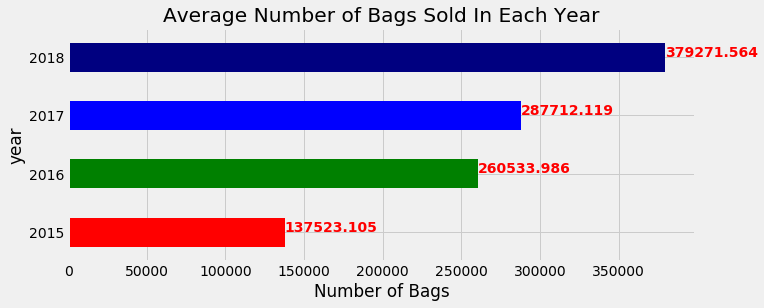

In [10]:
plt.figure(figsize=(10,4))
plt.xlabel('Number of Bags')
plt.title('Average Number of Bags Sold In Each Year')
data_avg['Total Bags'].plot(kind="barh",legend=False,color=['red','green','blue','navy'])
for i, v in enumerate(data_avg['Total Bags']):
    value = Decimal(v)
    plt.text(v + 3, i + .01, str(round(value,3)), color='red', fontweight='bold')

#### - Average number of bags sold had grown over the 3 years. Despite the higher price in 2017, more avocados were sold compare to the previous years.

## _For more details about the data, let's breakdown into months :_

Text(0.5, 1, 'Average Price In 2018')

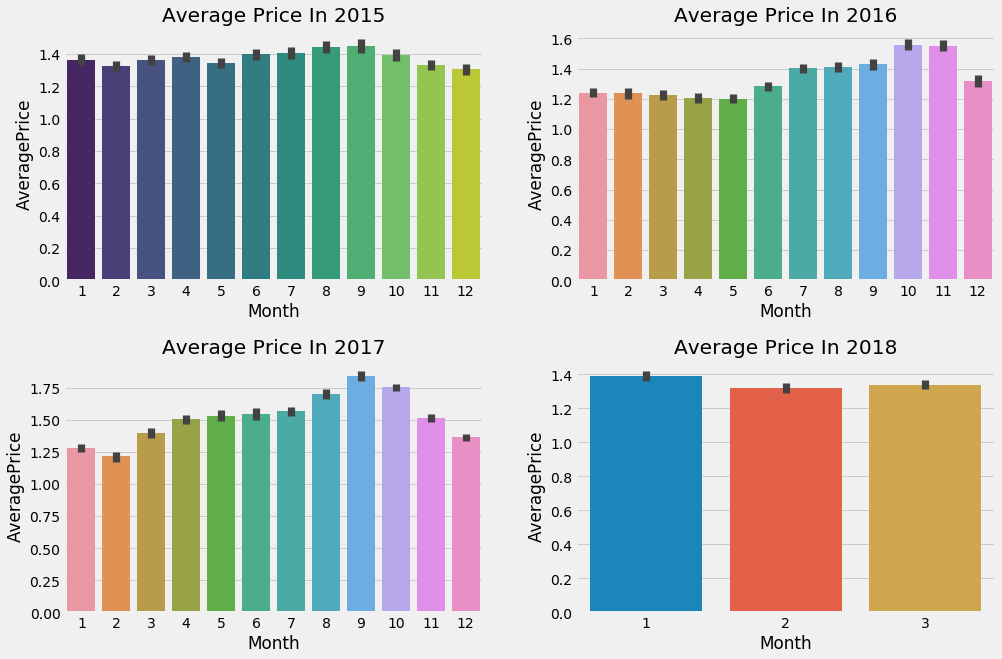

In [11]:
# By Month In Each Year
data['Month'] = data['Date'].dt.month
data_2015 = data[data['year'] == 2015]
data_2016 = data[data['year'] == 2016]
data_2017 = data[data['year'] == 2017]
data_2018 = data[data['year'] == 2018]

fig,ax = plt.subplots(2,2,figsize=(15,10))
plt.tight_layout(pad=4)
sns.barplot(data_2015['Month'],data_2015['AveragePrice'],ax=ax[0,0],palette='viridis').set_title('Average Price In 2015')    
sns.barplot(data_2016['Month'],data_2016['AveragePrice'],ax=ax[0,1]).set_title('Average Price In 2016')
sns.barplot(data_2017['Month'],data_2017['AveragePrice'],ax=ax[1,0]).set_title('Average Price In 2017')
sns.barplot(data_2018['Month'],data_2018['AveragePrice'],ax=ax[1,1]).set_title('Average Price In 2018')

Text(0.5, 1, 'Total Volume In 2018')

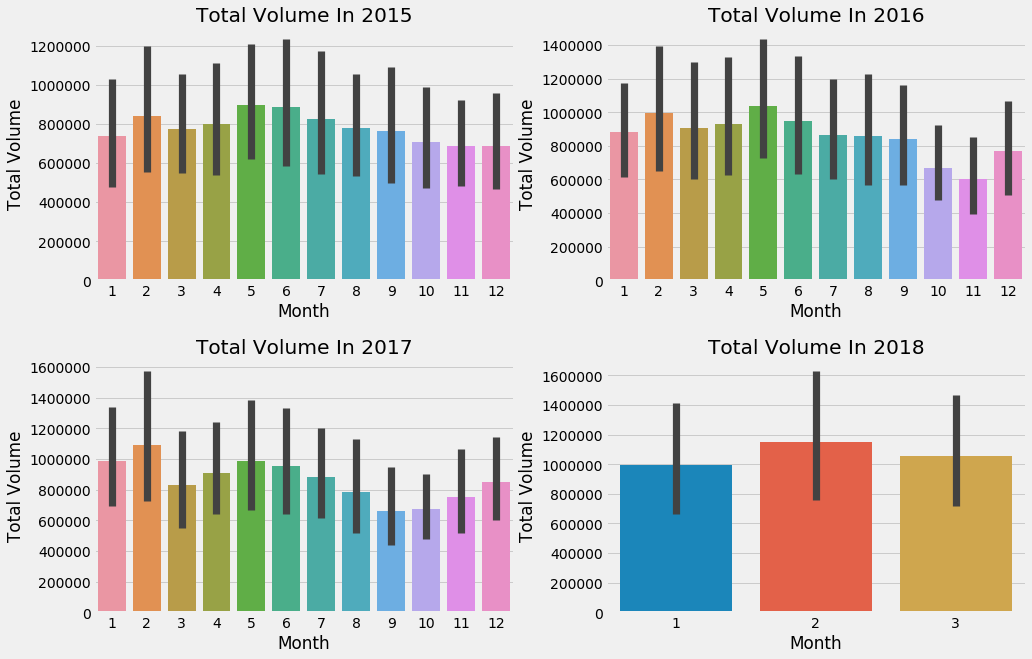

In [12]:
fig,ax = plt.subplots(2,2,figsize=(15,10))
plt.tight_layout(pad=4)
sns.barplot(data_2015['Month'],data_2015['Total Volume'],ax=ax[0,0]).set_title('Total Volume In 2015')
sns.barplot(data_2016['Month'],data_2016['Total Volume'],ax=ax[0,1]).set_title('Total Volume In 2016')
sns.barplot(data_2017['Month'],data_2017['Total Volume'],ax=ax[1,0]).set_title('Total Volume In 2017')
sns.barplot(data_2018['Month'],data_2018['Total Volume'],ax=ax[1,1]).set_title('Total Volume In 2018')

#### - Over the 3 years,  the average price in second half of the year was higher than the first half. On the other hand, the total volume sold in the second half was lower than the first half. From these comparisons, we can tell that the total volume sold in the second half was lower due to the higher price during the second half.

## Seasonal Analysis 


- In this part, we will explore the difference in price and the total volume during each season.

In [13]:
def seasons(df):
    res = ""
    if(df == (3 or 4 or 5)):
        res = "spring"
    elif(df == (6 or 7 or 8)):
        res = "summer"
    elif(df == (9 or 10 or 11)):
        res = "fall"
    else:
        res = "winter"
    
    return res

In [14]:
# Seasonal Analysis
spring = [3,4,5]
summer = [6,7,8]
fall = [9,10,11]




data['Season'] = data['Month'].apply(lambda x:seasons(x))

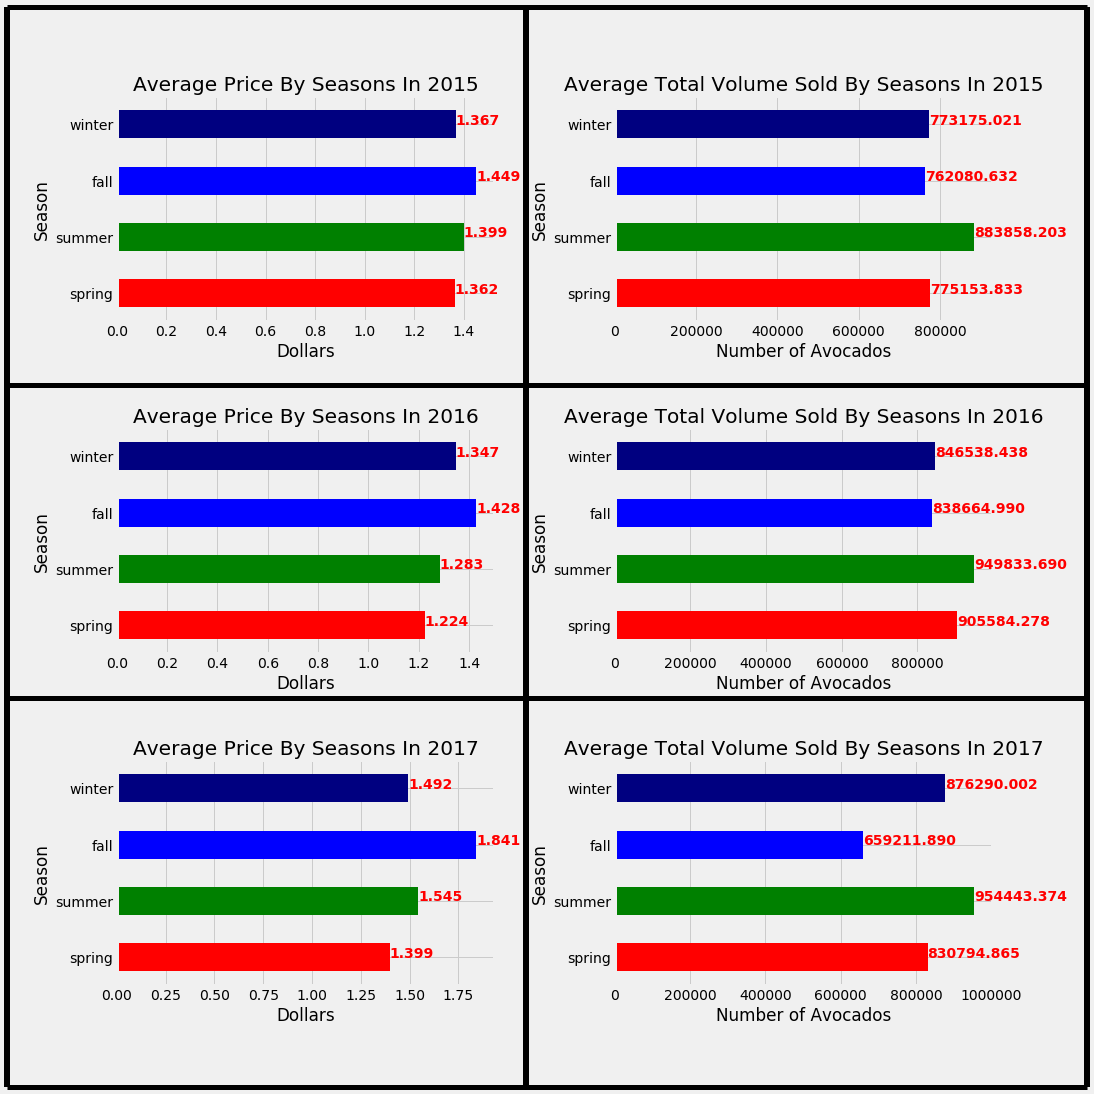

In [15]:
fig,ax = plt.subplots(3,2,figsize=(15,15))
plt.tight_layout(pad=6)
data_season = data.groupby(['Season','year']).mean().reset_index()
season_order = ["spring","summer","fall","winter"]


# 2015
data_season_2015 = data_season[data_season['year'] == 2015].set_index(['Season'])
data_season_2015 = data_season_2015.reindex(season_order)


ax[0,0].set_title('Average Price By Seasons In 2015')
ax[0,0].set_xlabel('Dollars')
data_season_2015['AveragePrice'].plot(kind="barh",color=['red','green','blue','navy'],ax=ax[0,0])
for i, v in enumerate(data_season_2015['AveragePrice']):
    value = Decimal(v)
    ax[0,0].text(v , i, str(round(value,3)), color='red', fontweight='bold')
    
#2016
data_season_2016 = data_season[data_season['year'] == 2016].set_index(['Season'])
data_season_2016 = data_season_2016.reindex(season_order)


ax[1,0].set_title('Average Price By Seasons In 2016')
ax[1,0].set_xlabel('Dollars')
data_season_2016['AveragePrice'].plot(kind="barh",color=['red','green','blue','navy'],ax=ax[1,0])
for i, v in enumerate(data_season_2016['AveragePrice']):
    value = Decimal(v)
    ax[1,0].text(v , i, str(round(value,3)), color='red', fontweight='bold')
    


#2017
data_season_2017 = data_season[data_season['year'] == 2017].set_index(['Season'])
data_season_2017 = data_season_2017.reindex(season_order)


ax[2,0].set_title('Average Price By Seasons In 2017')
ax[2,0].set_xlabel('Dollars')
data_season_2017['AveragePrice'].plot(kind="barh",color=['red','green','blue','navy'],ax=ax[2,0])
for i, v in enumerate(data_season_2017['AveragePrice']):
    value = Decimal(v)
    ax[2,0].text(v , i, str(round(value,3)), color='red', fontweight='bold')
    

# Total Volume Seasonal

data_season

#2015

ax[0,1].set_title('Average Total Volume Sold By Seasons In 2015')
ax[0,1].set_xlabel('Number of Avocados')
data_season_2015['Total Volume'].plot(kind="barh",color=['red','green','blue','navy'],ax=ax[0,1])
for i, v in enumerate(data_season_2015['Total Volume']):
    value = Decimal(v)
    ax[0,1].text(v , i, str(round(value,3)), color='red', fontweight='bold')

#2016
ax[1,1].set_title('Average Total Volume Sold By Seasons In 2016')
ax[1,1].set_xlabel('Number of Avocados')
data_season_2016['Total Volume'].plot(kind="barh",color=['red','green','blue','navy'],ax=ax[1,1])
for i, v in enumerate(data_season_2016['Total Volume']):
    value = Decimal(v)
    ax[1,1].text(v , i, str(round(value,3)), color='red', fontweight='bold')
    
    
#2017
ax[2,1].set_title('Average Total Volume Sold By Seasons In 2017')
ax[2,1].set_xlabel('Number of Avocados')
data_season_2017['Total Volume'].plot(kind="barh",color=['red','green','blue','navy'],ax=ax[2,1])
for i, v in enumerate(data_season_2017['Total Volume']):
    value = Decimal(v)
    ax[2,1].text(v , i, str(round(value,3)), color='red', fontweight='bold')
    

# Drawing Separation Lines
plt.plot([0,0], [0,1], color='black', lw=6,
         transform=plt.gcf().transFigure, clip_on=False)
plt.plot([1,1], [0,1], color='black', lw=6,
         transform=plt.gcf().transFigure, clip_on=False)
plt.plot([0.48,0.48], [0,1], color='black', lw=6,
         transform=plt.gcf().transFigure, clip_on=False)


# Horizontal
plt.plot([0, 1], [0.36, 0.36], color='black', lw=5,transform=plt.gcf().transFigure, clip_on=False)
plt.plot([0, 1], [0, 0], color='black', lw=5,transform=plt.gcf().transFigure, clip_on=False)
plt.plot([0, 1], [1, 1], color='black', lw=5,transform=plt.gcf().transFigure, clip_on=False)
plt.plot([0, 1], [0.65, 0.65], color='black', lw=5,transform=plt.gcf().transFigure, clip_on=False)

####  - According to the bar charts in the above, the peak season was summer(June to August) and the recession period was fall. Each summer sold the most avocados over the year. The average sales of avocados during summer had increased approximately by 70000 only in the time span of 2 years.  Adversely, each fall recorded the least sales. The average sales of avocados during the fall seasons had fallen over 3 years. This result might be due to the higher price in the fall and lower prices in summer.

### - Based on the exploration from the bar charts, we can notice that the total volume sold had impacts on the average price. Does it really?

In [16]:
print("The Correlation Between Average Price and Total Volume on average is : ",data_season['AveragePrice'].corr(data_season['Total Volume']))

The Correlation Between Average Price and Total Volume on average is :  -0.5313987764744036


#### - Since it has a moderate negative correlation with approximately -0.53, this can tell us that when either the average price or total volume increases, the other decreases.

Text(0.5, 1.0, 'Correlation Between Average Price And Other Numerical Features')

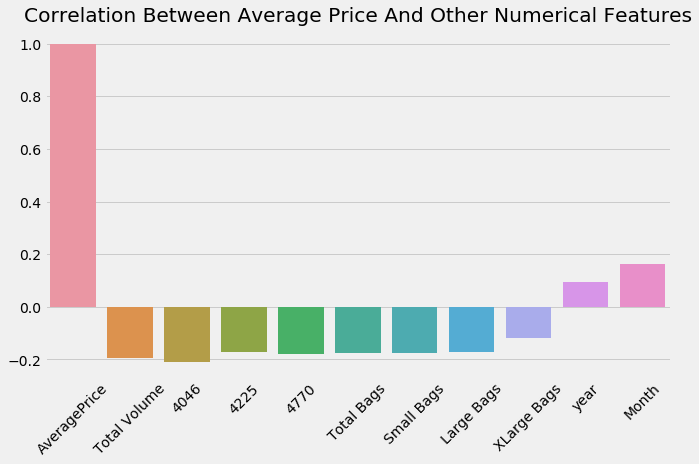

In [17]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
data.corr()['AveragePrice']
sns.barplot(data.corr()['AveragePrice'].index,data.corr()['AveragePrice'].values).set_title('Correlation Between Average Price And Other Numerical Features')

#### - From the observation, we can notice that other than the 'year' and the 'month' features, the rest of the features were negatively correlated with the average price. As avocados are elastic goods, this observation is rational. Since when the price increases, it will be less likely that the consumers will be purchasing the products. This will eventually lead to a decrease in total volume and total bags sold.

Text(0.5, 1, 'Correlations Between the Features')

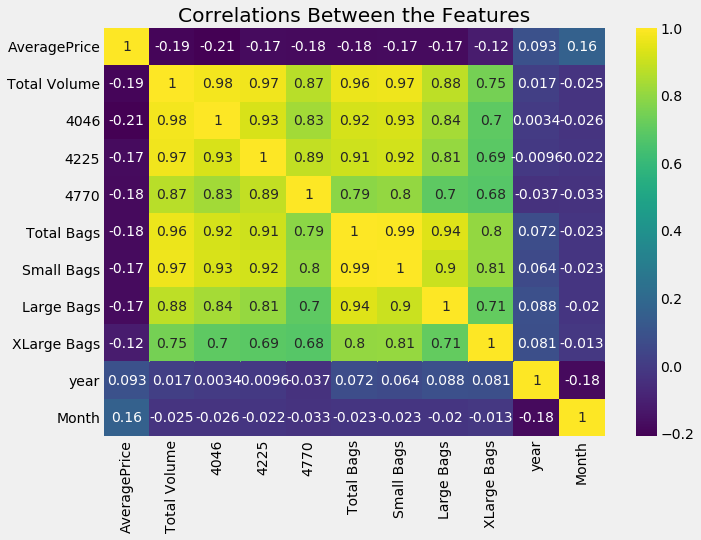

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot = True,cmap='viridis').set_title('Correlations Between the Features')

- As we can see on the heatmap, other than the 'AveragePrice','year','Month' features,the rest of the features had a strong correlation between each other. This observation was rational as the number of bags sold will be increased when the total volume sold increases and vice versa. The 'AveragePrice' feature has a negative correlation to all the features excluding 'year' and 'Month'. Therefore, as price increase, the quantities might slightly get affected.

## Categorical

#### - In this categorical section, we will look more in-depth on how the categorical features(regions, types,PLU code) might affect the price and total volume sold.

In [19]:
data_gr = data.groupby('region').sum().apply(np.int64)
data_gr = data_gr.sort_values(['Total Volume'],ascending=False)
data_gr.reset_index(inplace=True)

Text(0.5, 1.0, 'Total Volume of Avocados Sold In Each Regions')

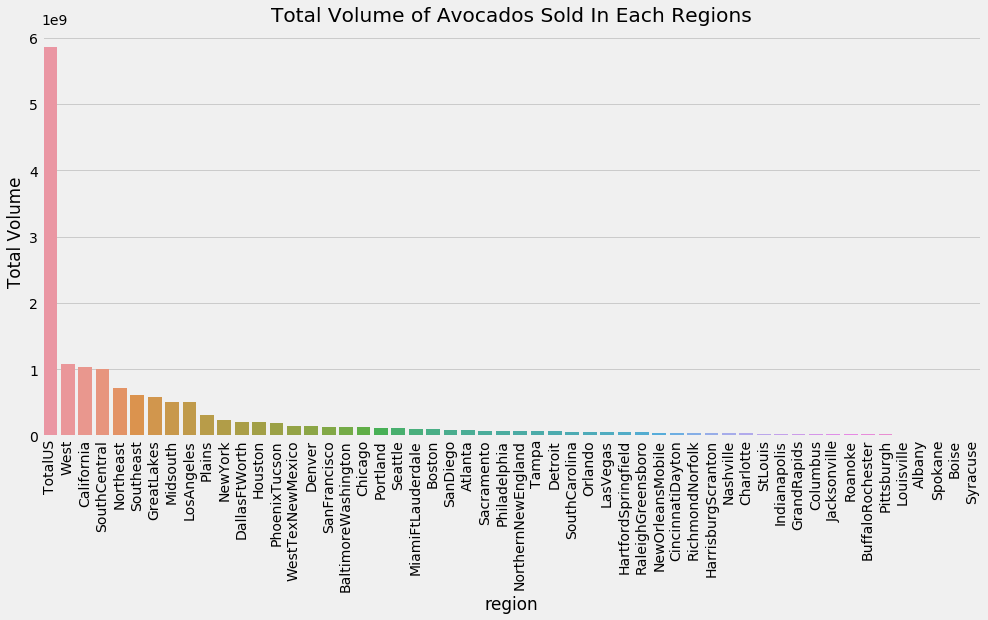

In [20]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.barplot(data_gr['region'],data_gr['Total Volume']).set_title('Total Volume of Avocados Sold In Each Regions')

Text(0.5, 1.0, 'Total Number Of Bags Sold In Each Regions')

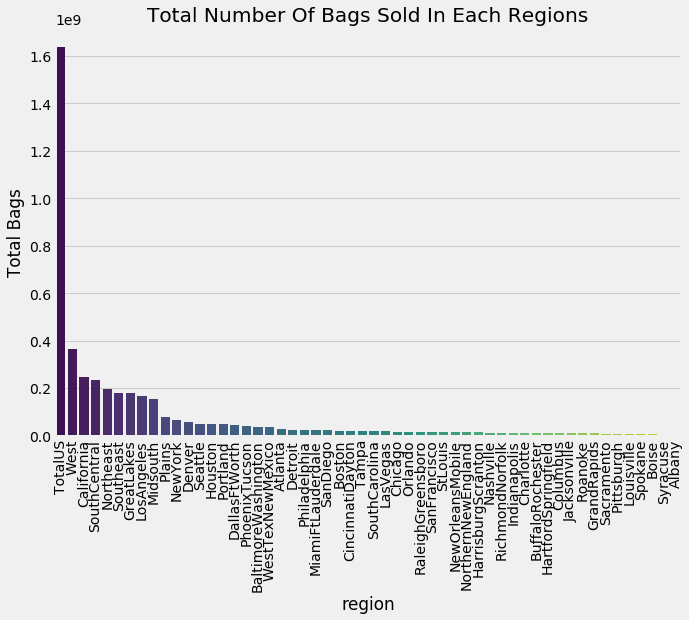

In [21]:
data_gr = data_gr.sort_values(['Total Bags'],ascending=False)
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data_gr['region'],data_gr['Total Bags'],palette='viridis').set_title('Total Number Of Bags Sold In Each Regions')

#### - From the barcharts above, Warmer areas such as west and south part of US, recorded more sales than the colder part of US(East and North). Was it due to the price? 

Text(0.5, 1.0, 'Average Price of Avocado In Each Regions')

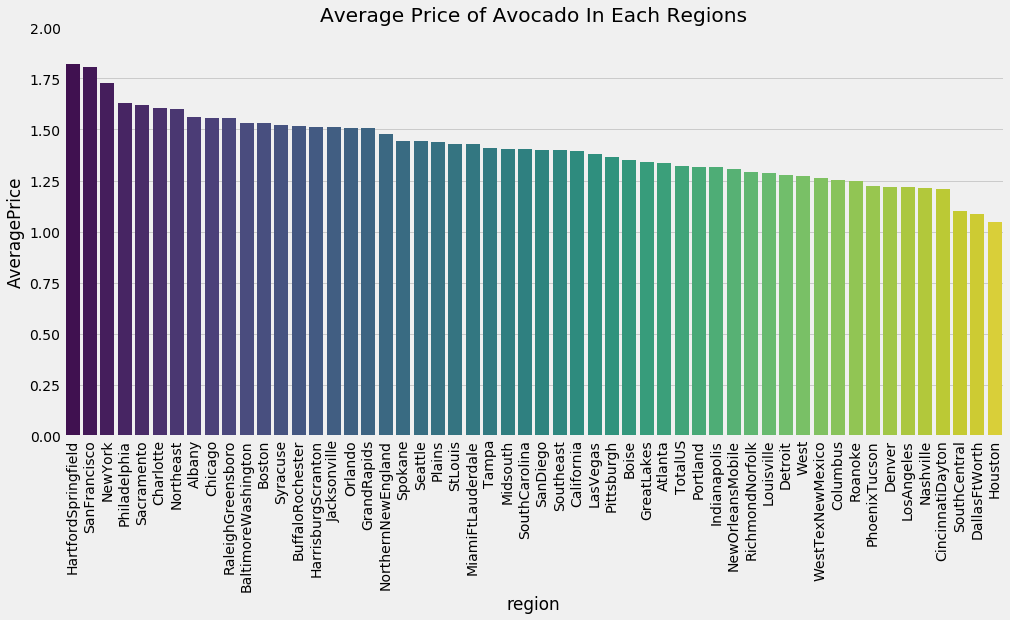

In [23]:
# Let's see the top 10 region with the Highest  avg price

data_gr_avg = data.groupby('region').mean().apply(np.float64).reset_index()
data_gr_avg = data_gr_avg.sort_values(['AveragePrice'],ascending=False)
plt.figure(figsize=(15,7))
plt.ylim(0,2)
plt.xticks(rotation=90)
sns.barplot(data_gr_avg['region'],data_gr_avg['AveragePrice'],palette='viridis').set_title('Average Price of Avocado In Each Regions')

Text(0.5, 1.0, 'Total Volume Sold Overtime from 4 main regions of USA')

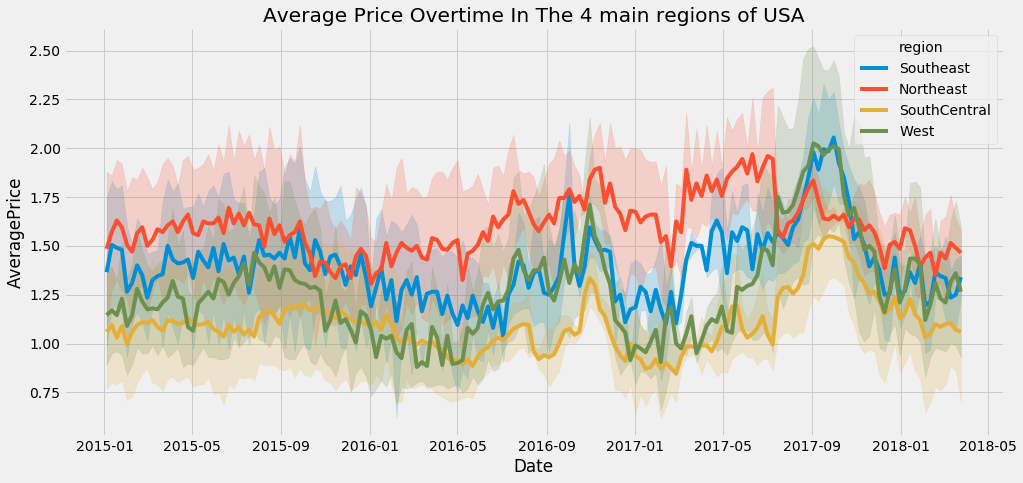

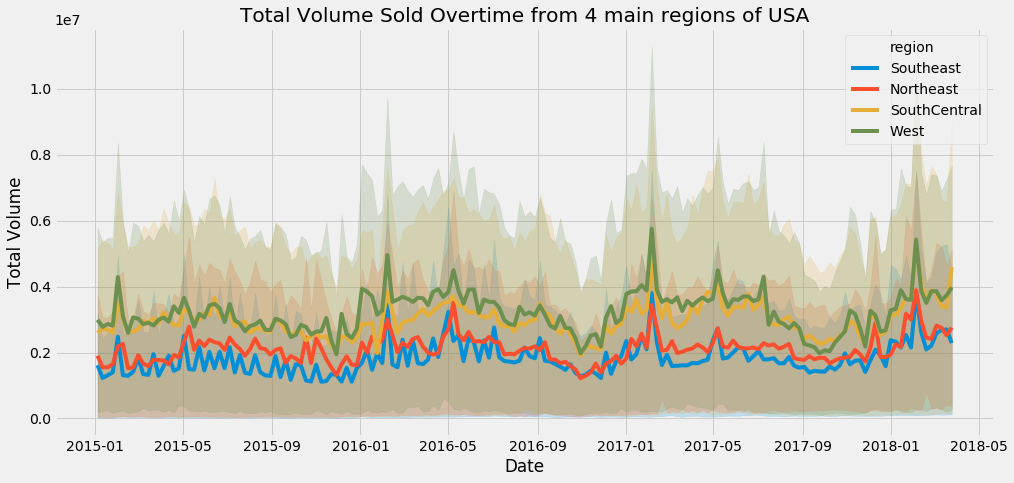

In [24]:
# Let's See the price and Total Volume sold in Warm Region and Colder Region
#Northeast,Southeast,SouthCentral,West
plt.figure(figsize=(15,7))
regions = ['Northeast','SouthCentral','Southeast','West']
data_region = data.loc[data['region'].isin(regions) & data['AveragePrice'] & data['Total Volume']]
sns.lineplot(data_region['Date'],data_region['AveragePrice'],hue=data_region['region']).set_title('Average Price Overtime In The 4 main regions of USA')
plt.figure(figsize=(15,7))
sns.lineplot(data_region['Date'],data_region['Total Volume'],hue=data_region['region']).set_title('Total Volume Sold Overtime from 4 main regions of USA')

#### - From the observations of the two different graphs above, in general, we can spot out that the southern area of the USA had lower prices than the northern or the eastern area of the USA. As shown on the bar chart, most cities or regions with more than $1.5 were from either north or east. Furthermore, from the line plot, northeast regions reached the highest price of avocados over 3 years compared to other major regions. The possible reason behind this might be due to the area of production. According to TAMARA PALMER on her blog "Avocado Prices Are Staggering — And Here's Why They Won't Get Much Better This Year", most of home-grown avocados were from California(~80%) and occasionally imported from Mexico. Therefore, the price of avocados in the Northeast might be more expensive due to transportation costs.

([<matplotlib.patches.Wedge at 0x1d93abc95c8>,
 [Text(0.07702897536243763, 1.1975251717415434, '4046'),
  Text(-0.21680701823757717, -1.180251971759815, '4225'),
  Text(1.1917348699594699, -0.14059871878038452, '4770')],
 [Text(0.04493356896142195, 0.698556350182567, '47.96%'),
  Text(-0.12647076063858667, -0.688480316859892, '48.31%'),
  Text(0.6951786741430239, -0.08201591928855764, '3.74%')])

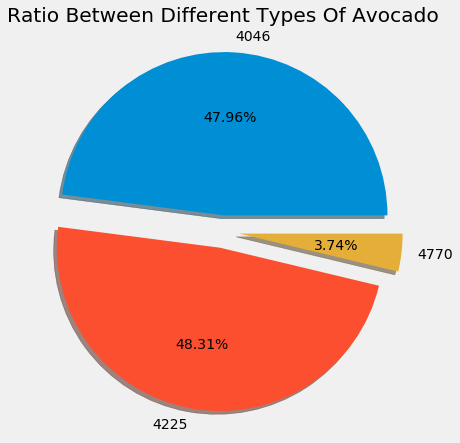

In [46]:
# Bar chart on types of avocado, types of bags
types_avocado = ['4046','4225','4770']
sum_4046 = data['4046'].sum()
sum_4225 = data['4225'].sum()
sum_4770 = data['4770'].sum()
data_ta = [sum_4046,sum_4225,sum_4770]
data_ta_label = ['4046','4225','4770']


plt.figure(figsize=(10,7))
plt.title('Ratio Between Different Types Of Avocado')
plt.pie(data_ta,labels=data_ta_label,autopct="%1.2f%%",shadow=True,explode =[0.1,0.1,0.1])


([<matplotlib.patches.Wedge at 0x1d93ad597c8>,
 [Text(-0.8755040020047082, 0.8206660358962956, 'Small Bags'),
  Text(0.8413663985687828, -0.8556299336508723, 'Large Bags'),
  Text(1.1990050660258516, -0.04885541571150431, 'XLarge Bags')],
 [Text(-0.5107106678360798, 0.47872185427283903, '76.03%'),
  Text(0.49079706583178995, -0.49911746129634216, '22.67%'),
  Text(0.6994196218484132, -0.028498992498377514, '1.30%')])

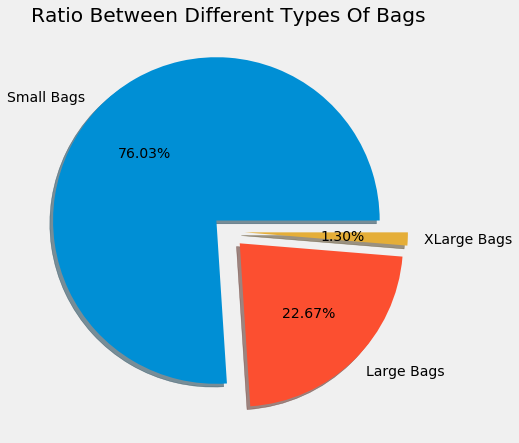

In [47]:
bags_type = ['Small Bags','Large Bags','XLarge Bags']
sum_small = data['Small Bags'].sum()
sum_large = data['Large Bags'].sum()
sum_xl = data['XLarge Bags'].sum()
bags_sum = [sum_small,sum_large,sum_xl]


plt.figure(figsize=(10,7))
plt.title('Ratio Between Different Types Of Bags')
plt.pie(bags_sum,labels=bags_type,autopct="%1.2f%%",shadow=True,explode =[0.1,0.1,0.1])

#### - From the first pie chart, the majority of consumers bought in smaller bags. Furthermore, most consumers prefer to purchase 4225 or 4046 rather than 4770. The reason might be that 4225 and 4046 is larger than 4770. From the observations above, we can tell that consumers were more willing to buy in a smaller amount than in bulk. This might be due to the expiration date of avocados. In general, unripped avocados last 3 to 7 days in the room temperature. Another possibility could be that majority of the consumers are normal consumers rather than brokers or wholesalers.

([<matplotlib.patches.Wedge at 0x1d93ae52948>,
 [Text(-1.1953277029861533, 0.10579074852673433, 'conventional'),
  Text(1.494159622542162, -0.1322385056050782, 'organic')],
 [Text(-0.6972744934085893, 0.061711269973928354, '97.19%'),
  Text(0.9961064150281079, -0.08815900373671878, '2.81%')])

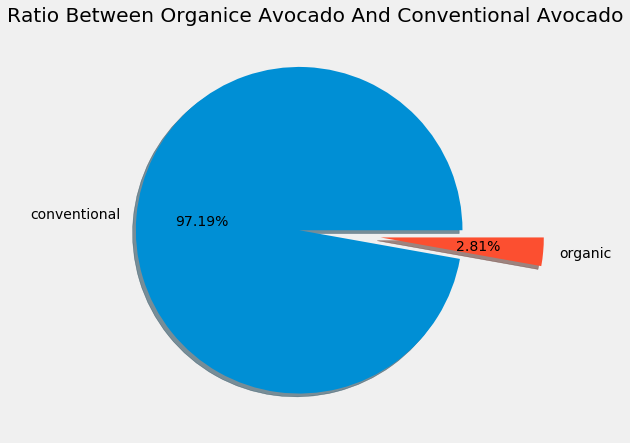

In [50]:
# Organic vs Conventional
data_types = data.groupby('type').sum().reset_index()
data_types
labels = data_types['type'].unique()

size = data_types['Total Volume'].values
plt.figure(figsize=(10,7))
plt.title('Ratio Between Organice Avocado And Conventional Avocado')
plt.pie(size,labels=labels,autopct="%1.2f%%",shadow=True,explode =[0.1,0.4])

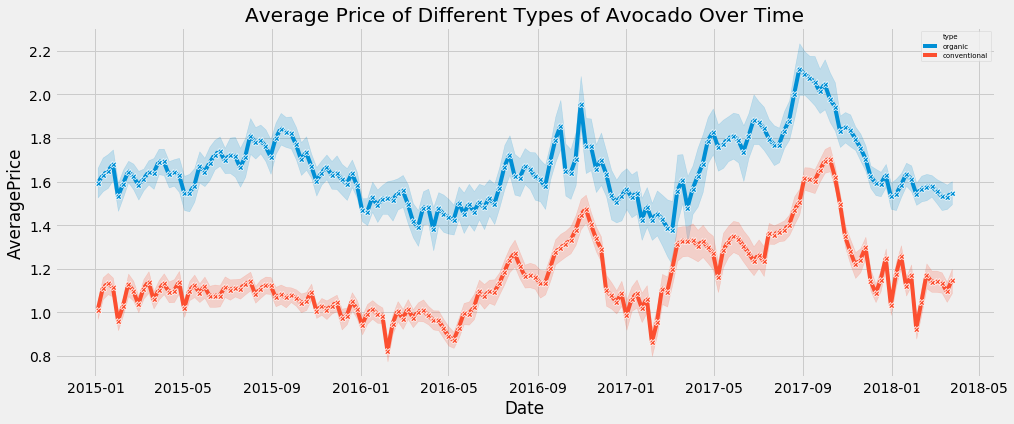

In [51]:

plt.figure(figsize=(15,6))
sns.lineplot(data['Date'],data['AveragePrice'],hue=data['type'],marker="X").set_title('Average Price of Different Types of Avocado Over Time')
plt.legend(loc = 'upper right',prop={'size':7})

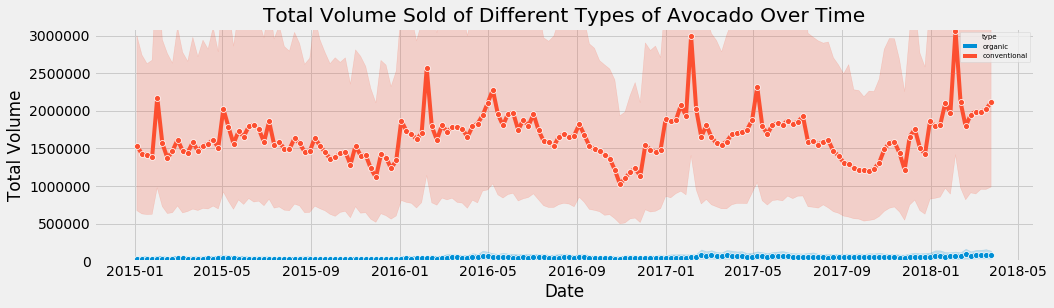

In [52]:
plt.figure(figsize=(15,4))
plt.ylim(0,3100000)
sns.lineplot(data['Date'],data['Total Volume'],hue=data['type'],marker="o").set_title('Total Volume Sold of Different Types of Avocado Over Time')
plt.legend(loc = 'upper right',prop={'size':7})

#### - Most of the consumers prefer to purchase conventional avocados due to it's lower price. Around 97 percent of consumers bought conventional avocados between 2015 to early 2018. Unexpectedly, price rise and fall patterns were very similar between organic and conventional. Therefore, over 3 years, the price gap between organic and conventional had maintained constantly between ( USD 0.4 ~ USD 0.6).

## Distribution

Text(0.5, 1.0, 'Average Price Distribution of Different Types of Avocados From 2015 to 2018')

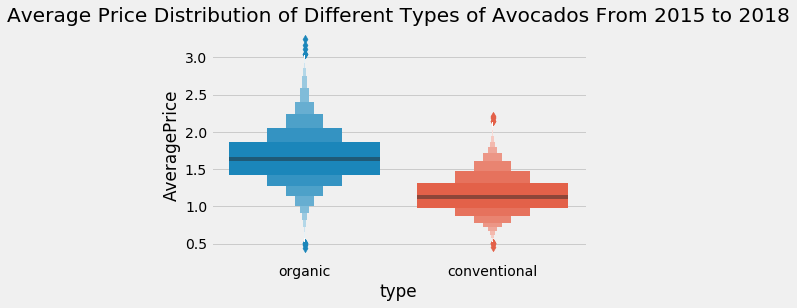

In [53]:
sns.boxenplot(data['type'],data['AveragePrice']).set_title('Average Price Distribution of Different Types of Avocados From 2015 to 2018')

#### - The median price of organic is approximately 0.5 dollars higher than the conventional. The lower quartile of the average price of organic was even higher than the higher quartile of the average price of conventiona

Text(0.5, 1.0, 'Total Volume Distribution of Different Types of Avocados')

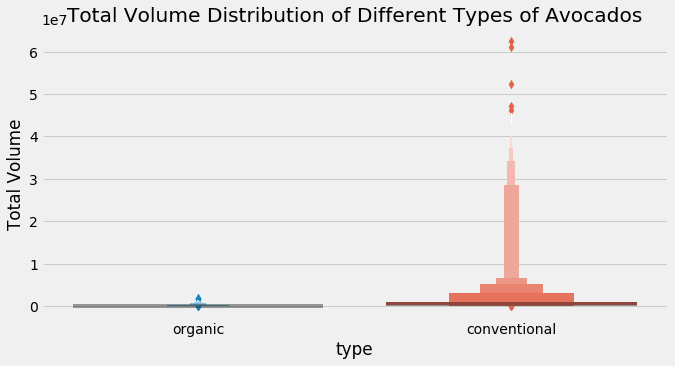

In [54]:
plt.figure(figsize=(10,5))
sns.boxenplot(data['type'],data['Total Volume']).set_title('Total Volume Distribution of Different Types of Avocados')

Text(0.5, 1.0, 'Total Volume Distribution of Different Types of Avocados Less Than 1 Million')

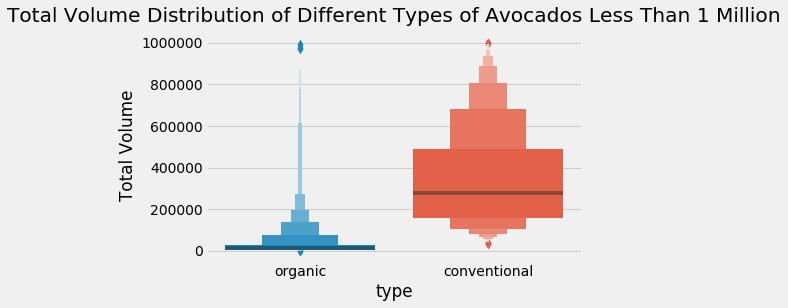

In [55]:
sns.boxenplot(data['type'],data[data['Total Volume'] <1000000]['Total Volume']).set_title('Total Volume Distribution of Different Types of Avocados Less Than 1 Million')

#### -Due to the relatively higher price of organic avocados, the median total volume sold was very close to 0.  On the other hand, the Inter-Quartile-Range of conventional avocados was wider than organic. In contrast to the average price distribution, conventional avocados' lower quartile of total volume sold was higher than the higher quartile of organics.

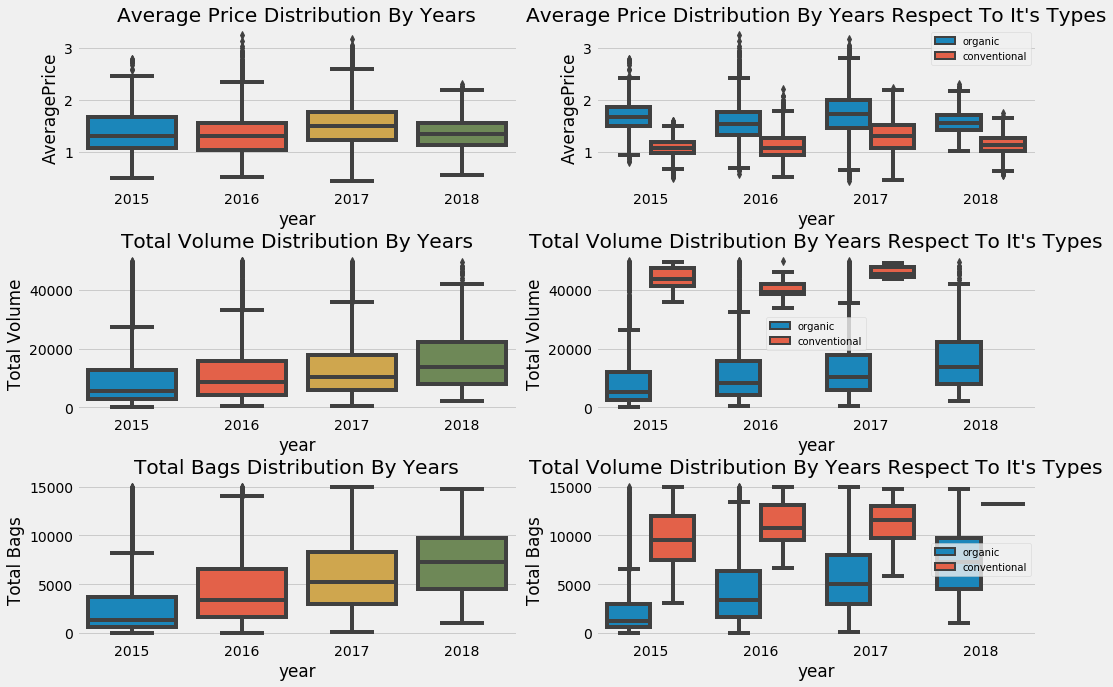

In [57]:
# Distribution of various categorical groups
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(15,10))
plt.tight_layout(pad= 3)
sns.boxplot(data['year'],data['AveragePrice'],ax=ax[0,0]).set_title('Average Price Distribution By Years')
sns.boxplot(data['year'],data['AveragePrice'],hue=data['type'],ax=ax[0,1]).set_title("Average Price Distribution By Years Respect To It's Types")

# Below 50000
sns.boxplot(data['year'],data[data['Total Volume'] < 50000]['Total Volume'],ax=ax[1,0]).set_title('Total Volume Distribution By Years')
sns.boxplot(data['year'],data[data['Total Volume'] < 50000]['Total Volume'],hue=data['type'],ax=ax[1,1]).set_title("Total Volume Distribution By Years Respect To It's Types")

#Below 15000
sns.boxplot(data['year'],data[data['Total Bags'] < 15000]['Total Bags'],ax=ax[2,0]).set_title('Total Bags Distribution By Years')
sns.boxplot(data['year'],data[data['Total Bags'] < 15000]['Total Bags'],hue=data['type'],ax=ax[2,1]).set_title("Total Volume Distribution By Years Respect To It's Types")

ax[0,1].legend(loc='best',prop={'size':10})
ax[1,1].legend(loc='best',prop={'size':10})
ax[2,1].legend(loc='best',prop={'size':10})

Text(0.5, 1, "Total Bags Distribution By Month Respect To It's Types")

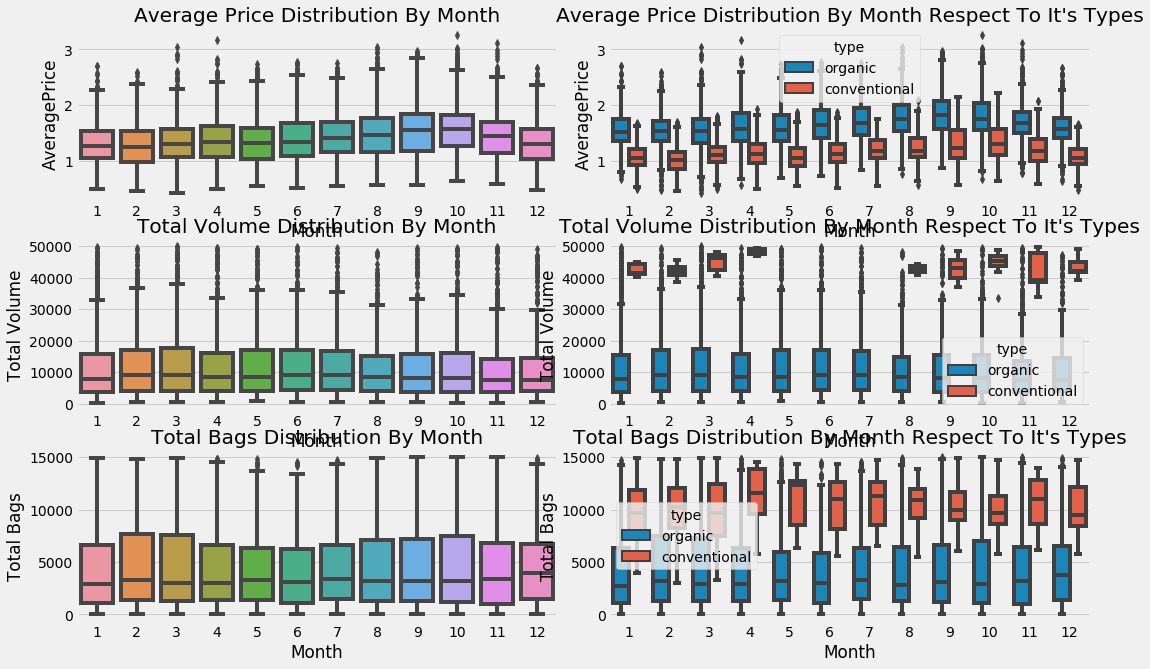

In [58]:
# Distribution by Month
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(15,9))
plt.tight_layout()
sns.boxplot(data['Month'],data['AveragePrice'],ax=ax[0,0]).set_title('Average Price Distribution By Month')
sns.boxplot(data['Month'],data['AveragePrice'],hue=data['type'],ax=ax[0,1]).set_title("Average Price Distribution By Month Respect To It's Types")
sns.boxplot(data['Month'],data[data['Total Volume'] < 50000]['Total Volume'],ax=ax[1,0]).set_title('Total Volume Distribution By Month')
sns.boxplot(data['Month'],data[data['Total Volume'] < 50000]['Total Volume'],hue=data['type'],ax=ax[1,1]).set_title("Total Volume Distribution By Month Respect To It's Types")
sns.boxplot(data['Month'],data[data['Total Bags'] < 15000]['Total Bags'],ax=ax[2,0]).set_title('Total Bags Distribution By Month')
sns.boxplot(data['Month'],data[data['Total Bags'] < 15000]['Total Bags'],hue=data['type'],ax=ax[2,1]).set_title("Total Bags Distribution By Month Respect To It's Types")

### *End of EDA*